# _G-i[mage]-dowloader_
#### _Download Google images with Selenium and Python_
***
#### _*Introduction*_
In this Jupyter notebook we will setup a chrome driver. Given a Google image search page the script downloads the images related to that search in a specified folder. Follow the cells below for a full explanation of the code.

#### _Imports_

In [1]:
#import necessary packages
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os
import traceback
import requests
import time

#### _Start Chrome Session_
- Setup a Chrome driver session with selenium.
- the chromedriver file is supposed to be in the same directory of the notebook. Change it if needed.

In [3]:
# setup a chrome driver and start a chrome session
driver_path = os.path.join(os.getcwd(),'chromedriver.exe')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_experimental_option('prefs', {'intl.accept_languages': 'en,en_US'})
driver = webdriver.Chrome(driver_path,options=chrome_options)

if everything went well a chrome browser was opened, just like in the image below.
<img src='assets/chrome_session_img.PNG' width="600px">
***

#### _Search the image needed_
Now you can perform your search, like the one in the image below.
<img src='assets/google_image_search.png' style="width:600px;margin-top:50px;margin-bottom:50px">
Note that there are two elements highlighted in green. **_It is mandatory that those elements are visible_** during the download phase, because Selenium will interact with:
* the image to download it
* the chevron right icon to go to the next image
***

#### _HTML structure of the page_
we can inspect the html structure of an element by right-clicking and selecting "Inspect". A navigation with the code will appear on the right.
<img src='assets/image_html.png' style ="width:600px;margin-top:50px;margin-bottom:50px">
we are interested in the ```<img>``` tag and ```class``` attribute.

For demonstration purposes you can run the cell below. Selenium will search for all the elements with ```tag="img"``` and ```class="n3VNCb"``` and store it in a list.

In [6]:
img_html_class="n3VNCb"
#find Image
img=[im.get_attribute('src') for im in driver.find_elements_by_css_selector('img') if im.get_attribute("class")==img_html_class]
print("I found {} images with the same class".format(len(img)))

I found 3 images with the same class


This is because the html structure of the page is so that the selected image, the previous one and the next one are all stored with the same tag and class. How to find it? trial and fail. I tried to dowload each of them and found out the structure. This is sometimes needed when scraping with Selenium or other libraries.

In conclusion, the list is organized in this way ```[previous image,target image,next image]```, so that we should always select the ```[1]``` component to get our target image.

The same applies to the chevron right icon we will use to go to next, with the difference that now ```tag="a"``` and ```class="gvi3cf"```.

#### _Wrap everything in a loop and start dowloading_

C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\shrkwhaleshark1325rcjpg.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\crackingthem.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\whale-shark-przychodzi-do-ciebie-podwodnego-bliska-portret-400-76612630.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Some_image.width-800.7258b88.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\GP01C3W_Web_size.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images-olc-whale_shark2_400_q85.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Rhincodon-typus-A-whale-shark-at-Gladden-Spit-Belize.png
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Rhincodon-typus-09.jpg
C:\Us

Traceback (most recent call last):
  File "<ipython-input-3-ee93fdb88cb4>", line 20, in <module>
    reponse = requests.get(src,timeout=5)
  File "C:\Users\giuli\anaconda3\lib\site-packages\requests\api.py", line 76, in get
    return request('get', url, params=params, **kwargs)
  File "C:\Users\giuli\anaconda3\lib\site-packages\requests\api.py", line 61, in request
    return session.request(method=method, url=url, **kwargs)
  File "C:\Users\giuli\anaconda3\lib\site-packages\requests\sessions.py", line 530, in request
    resp = self.send(prep, **send_kwargs)
  File "C:\Users\giuli\anaconda3\lib\site-packages\requests\sessions.py", line 637, in send
    adapter = self.get_adapter(url=request.url)
  File "C:\Users\giuli\anaconda3\lib\site-packages\requests\sessions.py", line 730, in get_adapter
    raise InvalidSchema("No connection adapters were found for {!r}".format(url))
requests.exceptions.InvalidSchema: No connection adapters were found for ''

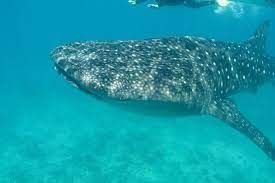

C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Whale_Shark.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\0.57099400_1526562668_stella-diamant-with-tagged-shark---copyright-simon-j-pierce,-www-simonjpierce-dot-com-(2).jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Rhincodon-typus-07.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Rhincodon-typus_shutterstock_287506460.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\dtsuNFr_mZf4szR60iJ7JXjE1V3tzAn2mRpK9PvASMg5MqbB3b1qy2UIwTpZ_yPv
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\c6-1414-alan-purton.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Rhincodon%20typus_0.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\imag

C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\img.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\whale_shark.jpeg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\1.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\01-whale-shark.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\whale-shark-dive-1024x768.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\whale-shark.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\content_article_profile_image_14784769afbef8055541b3b5c7172322d882ab5c_615.png
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\d41586-018-05018-y_15719052.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\w

C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\93edba5fcc3f670c17dd5c3f49dfe143--shark-whale-whales.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\whale-shark-rhincodon-typus.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\shutterstock_402412072.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\GettyImages-521980505-582990295f9b58d5b1205470-7aec6e7afa1041d488a22ecc5ec8b8f2.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\EJGVits3R2RdeE94rFSCjcMn8Omeja94iC7bzrjscnHN3F_PT39rDDclb81G2ipymrGBJl1xYNCWp8AQ605UmGBzXYw6E1O9kt9NqUN5SmDfHN-EtP-wwvdzNTsLYDkmwV8VP6kfTtwwWofzllT6D0LbRQ_jHA
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\158694
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Two-Adult-Female-W

Traceback (most recent call last):
  File "C:\Users\giuli\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\giuli\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\giuli\anaconda3\lib\http\client.py", line 1332, in getresponse
    response.begin()
  File "C:\Users\giuli\anaconda3\lib\http\client.py", line 303, in begin
    version, status, reason = self._read_status()
  File "C:\Users\giuli\anaconda3\lib\http\client.py", line 264, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\giuli\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\giuli\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\giuli\anaconda3\lib\ssl.py", line 1099, in read

C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\c37aa29382333044587a462c95e7a503.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\7f5f80ab6eebcff7f73fccd772f41916.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Swimming-with-whale-sharks-in-Djibouti-10.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Whale-shark-and-snorkelers-Image-credit-Anna-Flam-Marine-Megafauna-Foundation.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Whale-Shark-scaled.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\shutterstock_70078366-600x400.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5f83fc7cf1b864137bbfecb4%2F0x0.jpg%3FcropX1%3D0%26cropX2%3D4288%26

C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\3vO05TA0ZrHatabaIkAsgydwy1LiGzju0NhiJbirJw6K_QlGldj6kXPIBfxrrJ8vZxqkc1xEyXjjUna8dQT-D377dUu5QLnOW5K2Cy_8W4H_eXtn2RqFYR1SMN6AYuL1bStmO9YhzyDdRmFiap7ruw
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\whale-sharks-djibouti-joshua-barton-03.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\1-s2.0-S0165783606004024-gr2.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Tanzania-Zanzibar-Snorkelling-Whale-Sharks-Timbuktu-Travel.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\imag

C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\images
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\47e656a977fa8c9cd5c5fd031190a5b2.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Whale-shark-1.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\discover-raja-am

Traceback (most recent call last):
  File "C:\Users\giuli\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\giuli\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\giuli\anaconda3\lib\http\client.py", line 1332, in getresponse
    response.begin()
  File "C:\Users\giuli\anaconda3\lib\http\client.py", line 303, in begin
    version, status, reason = self._read_status()
  File "C:\Users\giuli\anaconda3\lib\http\client.py", line 264, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\giuli\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\giuli\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\giuli\anaconda3\lib\ssl.py", line 1099, in read

C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\5864.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\c1447736dbbfd0d99e738c885d43cecd.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Whale-shark.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\150605123259-whale-shark-oslob-super-169.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\shutterstock_133560119.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\GettyImages-521980505-582990295f9b58d5b1205470-7aec6e7afa1041d488a22ecc5ec8b8f2.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\3f54b216e0a7f028b5b50d1bb461236a.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\mmf_whale_shark_653376.jpg
C:\Users\giuli

C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\whale-sharks-lede.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Txb4kMxtVmDvQcuOmk49UU9_ev1hGiIal9x7ncjQemG-b_c_orbPvs59C0QVN4ftNG7CqGIqRtc2kkuqQi429Sd8rDYxdCjF9UVUCDWRP42ZAtft-fpyhXnUidcbNsqjuDm9X_LeafLrMCkrRZUt0Flcsku-irASMvE
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Swimming-With-a-Whale-Shark-scaled.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\61.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\a78twuelb5glomxtxohx.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\Similan_Dive_Center_-_great_whale_shark_1200px-cropped.jpg
C:\Users\giuli\OneDrive\Desktop\Python_Projects\Shark_Classification\images\whale_shark\whale-shark-with-fish-e1491727706949.jpg
C:\Users\giuli\OneDrive\Des

IndexError: list index out of range

In [3]:
nimages_to_download=600
imagefoldername="images"
speciefoldername="whale_shark"
imagename="hammerhead-shark"

img_html_class="n3VNCb"
btn_html_class="gvi3cf"

image_folder = os.path.join(os.getcwd(),imagefoldername,speciefoldername)

count=1
while True:    
    time.sleep(1)
    
    #find Image
    img=[im.get_attribute('src') for im in driver.find_elements_by_css_selector('img') if im.get_attribute("class")==img_html_class]

    #Save File
    try:
        src=img[1]
        reponse = requests.get(src,timeout=5)
        if reponse.status_code == 200:
            imageout=os.path.join(image_folder,src.split('/')[-1].split('?')[0])
            print(imageout)
            if ".jpg" in imageout or ".ppg" in imageout:
            #imagename+"_"+str(count).zfill(9)+".jpg".format(count)
                with open(imageout,"wb") as file:
                    file.write(reponse.content)
                    count+=1
    except:
        print("there was a problem in dowloading the image")
        traceback.print_exc()
        
    #Click Next        
    btn=[im for im in driver.find_elements_by_css_selector('a') if im.get_attribute("class")==btn_html_class]
    btn[1].click()
    
    if count==nimages_to_download:break